In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 전처리

In [2]:
dataset = pd.read_csv('RansomwareData.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, 10001 to 0.30934
dtypes: int64(30970)
memory usage: 359.9 MB


In [4]:
dataset.head(5)

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.columns = [i + 1 for i in range(30970)]
dataset

,1,2,3,4,5,6,7,8,9,10,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = dataset.iloc[:, 3:14703]
data

,4,5,6,7,8,9,10,11,12,13,...,14694,14695,14696,14697,14698,14699,14700,14701,14702,14703
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,0,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1521,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label = dataset.iloc[:, 1]
label

0       1
1       1
2       1
3       1
4       1
       ..
1518    0
1519    0
1520    0
1521    0
1522    0
Name: 2, Length: 1523, dtype: int64

## feature 줄이기

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
print('사용할 축의 개수: ', d)

사용할 축의 개수:  258


### 축 258개 뽑기

In [10]:
pca = PCA(n_components = 258)
pca_array = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index = data.index, columns = [f"pc{num+1}" for num in range(258)])

pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc249,pc250,pc251,pc252,pc253,pc254,pc255,pc256,pc257,pc258
0,-2.622135,1.332123,-0.473172,1.618281,0.216840,1.698306,2.000465,-2.318343,-0.899881,-0.906967,...,-0.093882,-0.076290,-0.023316,0.093463,-0.002595,0.058388,0.012589,0.055124,-0.160412,-0.100323
1,-4.599713,-1.152587,1.221970,-0.133521,0.352287,-0.420311,0.520105,0.136377,0.013097,-0.041981,...,0.047192,-0.076704,-0.009341,-0.082779,-0.159676,0.116966,-0.130944,-0.137154,-0.116674,-0.097077
2,-3.795693,-1.018312,-0.021761,0.016083,0.425003,-0.310569,-0.146372,0.398844,-0.096439,-0.011507,...,0.161647,-0.014970,0.087817,0.074347,0.074685,-0.101010,-0.103779,-0.084705,0.000940,0.054623
3,0.365095,3.574620,-0.934242,0.497939,-0.942719,2.637991,-0.137824,1.710858,-0.149450,0.094025,...,0.014676,-0.059970,-0.059934,-0.002033,-0.015578,-0.039001,-0.061606,-0.035029,-0.034596,-0.060484
4,-3.089622,0.571812,-0.897560,0.126263,0.073620,0.454674,0.136326,0.462900,-0.288154,-0.268796,...,-0.016253,0.023460,0.069584,-0.020913,0.035043,0.101313,0.235169,0.095867,-0.098447,-0.014877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,-1.411481,1.528741,-0.086423,-0.676362,-2.332083,-1.123374,-1.160184,-0.402846,0.489632,-0.727571,...,0.031417,-0.215843,-0.123906,-0.074975,-0.069934,0.008465,0.095029,0.059789,-0.138768,-0.193901
1519,-1.333911,-0.586923,-3.678160,0.328355,-0.552479,-0.908446,-1.628735,-0.196478,-0.261015,0.677773,...,0.010336,0.012814,-0.036623,-0.014970,0.018456,0.053627,0.003671,-0.001615,-0.010694,0.030717
1520,5.839233,2.828727,2.630433,2.916428,-0.598627,-1.484454,-0.079610,-2.278516,0.914773,-0.026217,...,0.022183,-0.088614,-0.094390,-0.099276,0.078151,-0.122554,0.037262,-0.039935,0.016881,-0.025847
1521,5.495625,-1.214828,2.668984,-0.291725,-2.448988,-0.730944,-0.124972,-0.796940,0.817775,-0.564538,...,0.068500,0.021329,-0.053606,-0.024355,0.091820,0.137825,-0.184875,0.108105,0.239824,-0.177896


In [12]:
result = pd.DataFrame({
    '설명가능한 분산 비율(고윳값)':pca.explained_variance_,
    '기여율':pca.explained_variance_ratio_},
    index=np.array([f"pc{num+1}" for num in range(258)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pc1,16.304856,0.227526,0.227526
pc2,5.045492,0.070407,0.297933
pc3,3.896517,0.054374,0.352307
pc4,2.674467,0.037321,0.389628
pc5,2.148578,0.029982,0.419610
...,...,...,...
pc254,0.017897,0.000250,0.948675
pc255,0.017726,0.000247,0.948922
pc256,0.017183,0.000240,0.949162
pc257,0.017119,0.000239,0.949401


## 모델 학습

### 데이터 셋 만들기

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(pca_df,
                                                    label,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [15]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1218, 258)
y_train:  (1218,)
X_test:  (305, 258)
y_test:  (305,)


### 필요한 라이브러리

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

## 1. RandomForest 모델

### 1.1 RandomForest 학습

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model_rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [5, 10, 50, 100],
}

grid_rf =  GridSearchCV(model_rf, param_grid = param_grid, cv = 10, refit = True)
grid_rf.fit(X_train, y_train)

print('best parameters: ', grid_rf.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'n_estimators': 100}


In [42]:
y_pred = grid_rf.predict(X_test)

### 1.2 RandomForest 성능 측정

#### 1.2.1 정확도

In [24]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

accuracy: 97.05


#### 1.2.2 confusion matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[187,   1],
       [  8, 109]], dtype=int64)

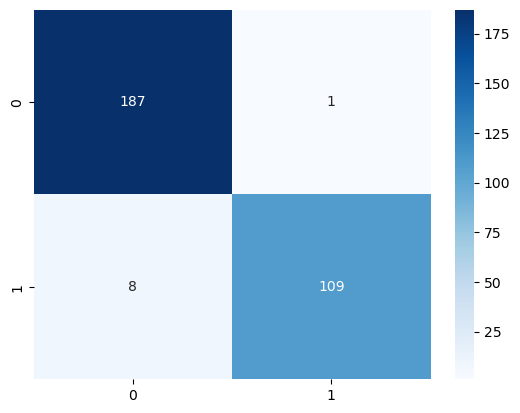

In [23]:
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

#### 1.2.3 precision, recall, f1 score

In [25]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 99.09
recall: 93.16
f1 score: 96.04


## 2. XGBoost 모델

### 2.1 XGBoost 학습

In [27]:
import xgboost as xgb

In [28]:
model_xgb = xgb.XGBClassifier() 
param_grid = { 
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [None]
}

grid_xgb =  GridSearchCV(model_xgb, param_grid = param_grid, cv = 10, refit = True)
grid_xgb.fit(X_train, y_train)

print('best parameters: ', grid_xgb.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'learning_rate': 0.3, 'max_depth': None, 'n_estimators': 100}


In [29]:
y_pred = grid_xgb.predict(X_test)

## 2.2 XGBoost 성능 측정

#### 2.2.1 정확도

In [30]:
print('accarncy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

accarncy: 96.39


#### 2.2.2 confusion matrix

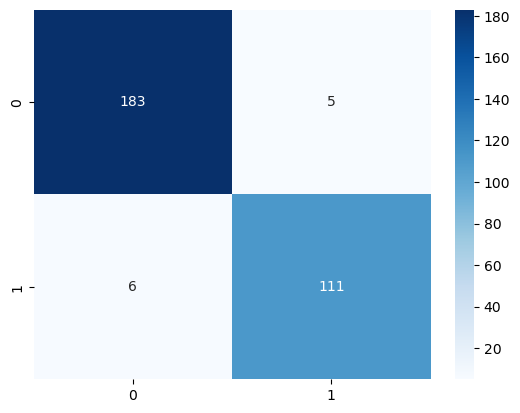

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

#### 2.2.3 precision, recall, f1 score

In [32]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 95.69
recall: 94.87
f1 score: 95.28


## 3. SVM 모델

### 3.1 SVM 학습

In [33]:
from sklearn import svm
from sklearn.svm import SVC

In [34]:
model_svm = SVC() 
param_grid = { 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_svm =  GridSearchCV(model_svm, param_grid = param_grid, cv = 10, refit = True)
grid_svm.fit(X_train, y_train)

print('best parameters: ', grid_svm.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'kernel': 'linear'}


In [35]:
model_linearsvm = SVC(kernel = 'linear') 
param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100],
}

grid_linearsvm =  GridSearchCV(model_linearsvm, param_grid = param_grid, cv = 10, refit = True)
grid_linearsvm.fit(X_train, y_train)

print('best parameters: ', grid_linearsvm.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'C': 0.1}


In [36]:
y_pred = grid_linearsvm.predict(X_test)

### 3.2 SVM 성능 측정

#### 3.2.1 정확도

In [37]:
print('accarncy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100)) 

accarncy: 96.39


#### 3.2.2 confusion matrix

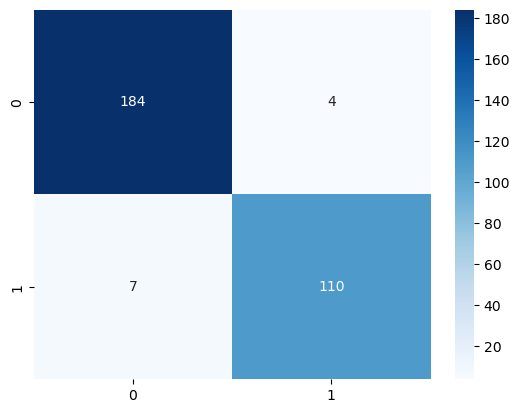

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

#### 3.2.3 precision, recall, f1 score

In [39]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 96.49
recall: 94.02
f1 score: 95.24
